In [11]:
import numpy as np
import netCDF4
import scipy
from scipy import stats
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as image
import matplotlib

In [12]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [13]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [14]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-3.0, vmax = 3.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [15]:
z_test_tsne_50_50 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/50_50_2D_PCA_Latent_Space__31.npy")
z_test_tsne_track = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Track_2D_PCA_Latent_Space__31.npy")

Test_Images_50_50 = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_W_Test.npy")
Test_Images_Track = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Trackable_Space_Time_W_Test.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")

Test_Images_50_50 = np.interp(Test_Images_50_50, (0, 1), (Min_Scalar, Max_Scalar))
Test_Images_Track = np.interp(Test_Images_Track, (0, 1), (Min_Scalar, Max_Scalar))

elbo_50_50 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/Anomalies/50_50_ELBO_Data__31.npy")
elbo_Track = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/Anomalies/Trackable_ELBO_Data__31.npy")


elbo_50_50 = elbo_50_50*-1.0
elbo_Track = elbo_Track*-1.0

In [16]:
print(elbo_50_50.max())
print(elbo_50_50.min())
print(elbo_Track.max())
print(elbo_Track.min())

-6195.822380401934
-15698.963381724094
5998.013114324362
-14150.248772734862


-0.914178787919032
0.2215311473962059


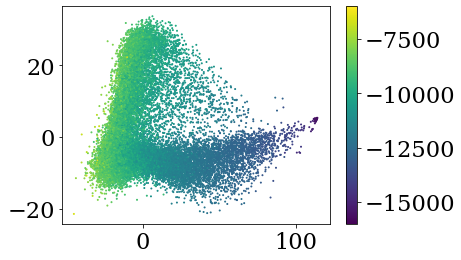

In [17]:
plt.scatter(x=z_test_tsne_50_50[:, 0], y=z_test_tsne_50_50[:, 1], c=elbo_50_50, s=1, vmin = -16000, vmax = -6000)
plt.colorbar()

print(stats.pearsonr(z_test_tsne_50_50[:, 0], elbo_50_50)[0])
print(stats.pearsonr(z_test_tsne_50_50[:, 1], elbo_50_50)[0])

-0.8780427431162148
0.3362569345057801


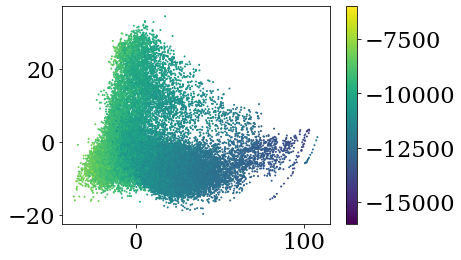

In [18]:
plt.scatter(x=z_test_tsne_track[:, 0], y=z_test_tsne_track[:, 1], c=elbo_Track, s=1, vmin = -16000, vmax = -6000)
plt.colorbar()

print(stats.pearsonr(z_test_tsne_track[:, 0], elbo_Track)[0])
print(stats.pearsonr(z_test_tsne_track[:, 1], elbo_Track)[0])

In [19]:
unlikely_50_50 = elbo_50_50.argsort()[-100:][::-1]
likely_50_50 = elbo_50_50.argsort()[:10][::-1]

Unlikely_Images_50_50 = Test_Images_50_50[unlikely_50_50,:,:]
Likely_Images_50_50 = Test_Images_50_50[likely_50_50,:,:]

unlikely_Track = elbo_Track.argsort()[-10:][::-1]
likely_Track = elbo_Track.argsort()[:10][::-1]

Unlikely_Images_Track = Test_Images_Track[unlikely_Track,:,:]
Likely_Images_Track = Test_Images_Track[likely_Track,:,:]

In [20]:
#for i in range(len(Unlikely_Images_50_50)):
#    plot_generator_paper(Unlikely_Images_50_50[i,:,:], Xs, Zs)
    

In [21]:
#for i in range(len(Unlikely_Images_Track)):
#    plot_generator_paper(Unlikely_Images_Track[i,:,:], Xs, Zs)

## Omega 500

In [22]:
w_500_labels = np.nanmean(np.squeeze(Test_Images_50_50[:,-12,:]),axis=1)
w_500_labels_absolute = np.nanmean(np.squeeze(np.abs(Test_Images_50_50[:,-12,:])),axis=1)

-0.0032779615204128094
-0.003919341784901225


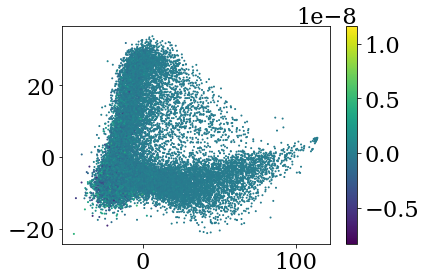

In [23]:
plt.scatter(x=z_test_tsne_50_50[:, 0], y=z_test_tsne_50_50[:, 1], c=w_500_labels, s=1)
plt.colorbar()

print(stats.pearsonr(z_test_tsne_50_50[:, 0], w_500_labels)[0])
print(stats.pearsonr(z_test_tsne_50_50[:, 1], w_500_labels)[0])

-0.7315753501685482
-0.17630103497984387


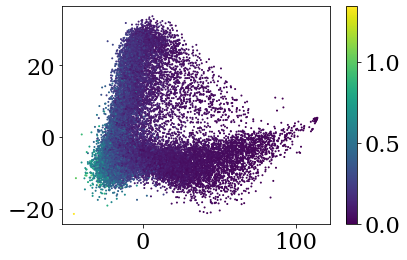

In [24]:
plt.scatter(x=z_test_tsne_50_50[:, 0], y=z_test_tsne_50_50[:, 1], c=w_500_labels_absolute, s=1)
plt.colorbar()

print(scipy.stats.pearsonr(z_test_tsne_50_50[:, 0], w_500_labels_absolute)[0])
print(scipy.stats.pearsonr(z_test_tsne_50_50[:, 1], w_500_labels_absolute)[0])

In [25]:
unlikely_500 = w_500_labels_absolute.argsort()[-10:][::-1]
likely_500 = w_500_labels_absolute.argsort()[:10][::-1]

Unlikely_Images_500 = Test_Images_50_50[unlikely_500,:,:]
Likely_Images_500 = Test_Images_50_50[likely_500,:,:]

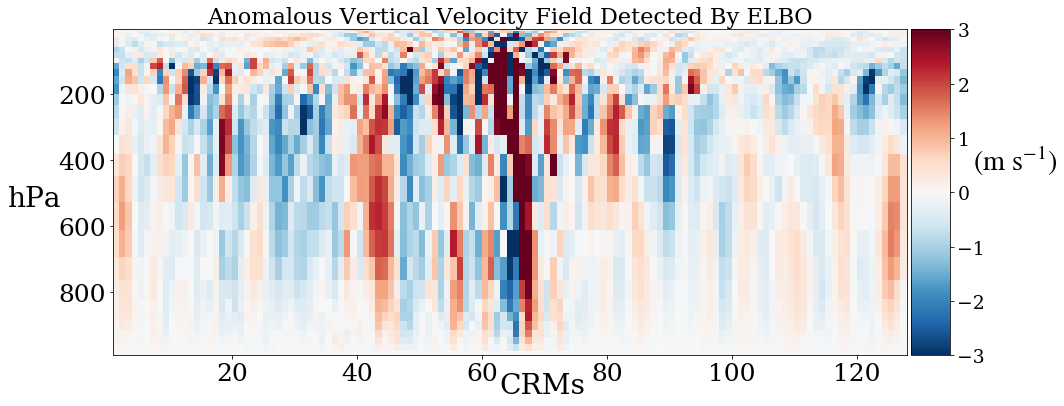

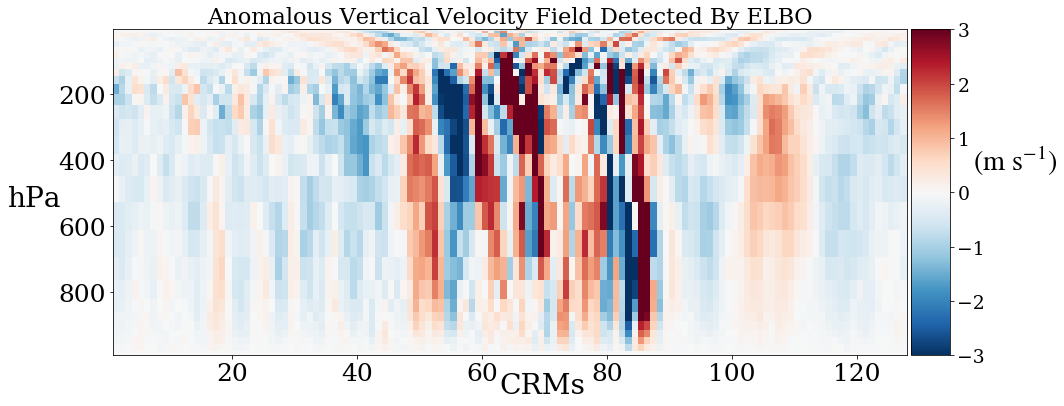

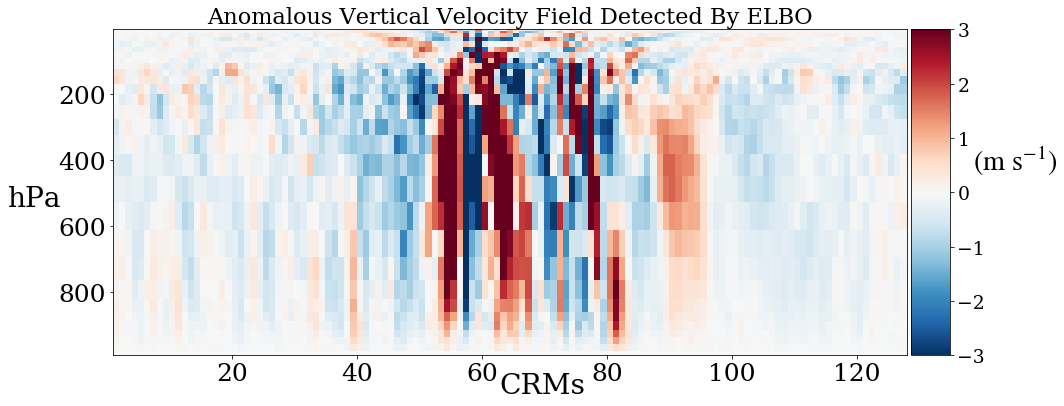

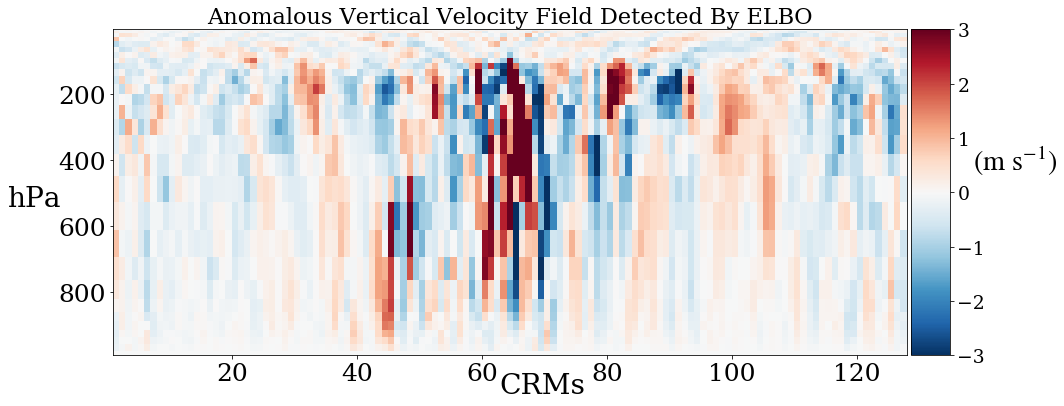

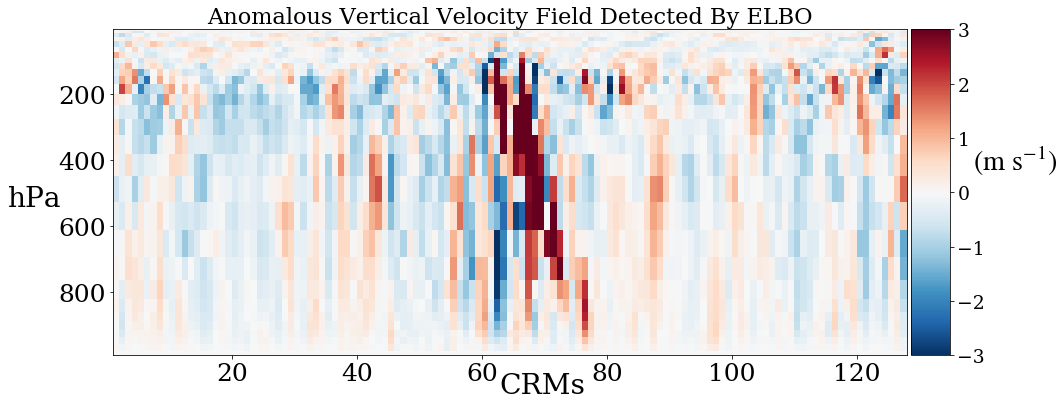

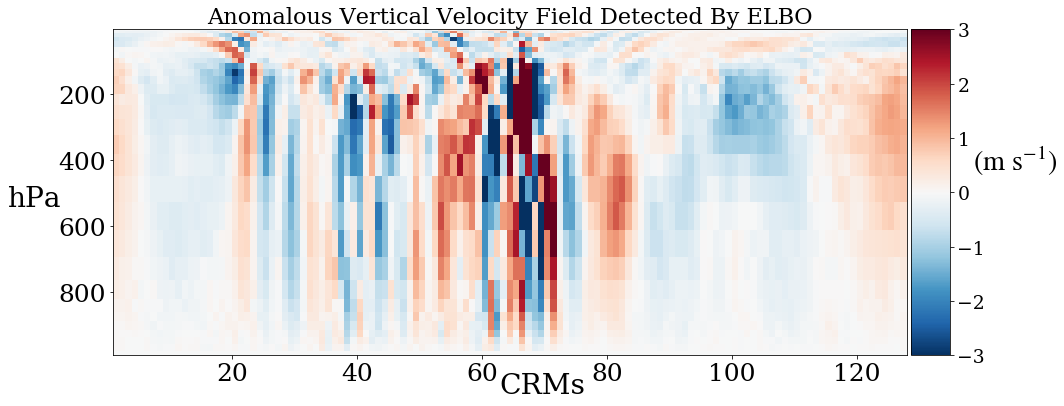

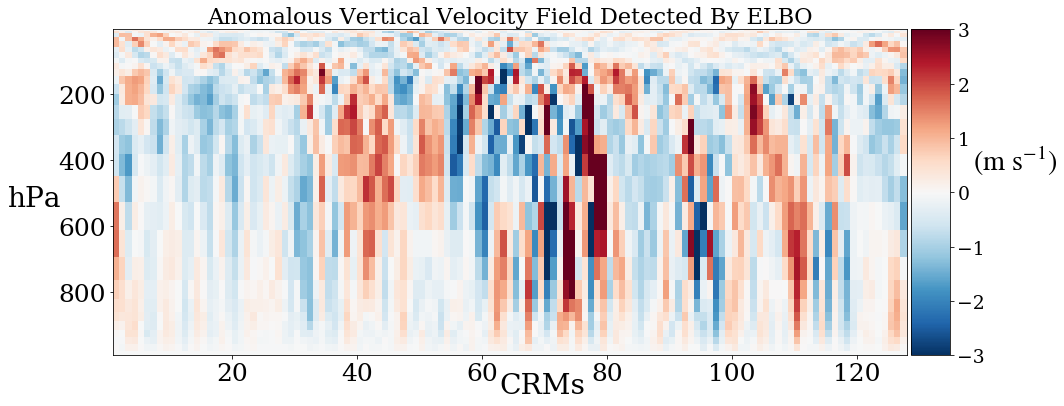

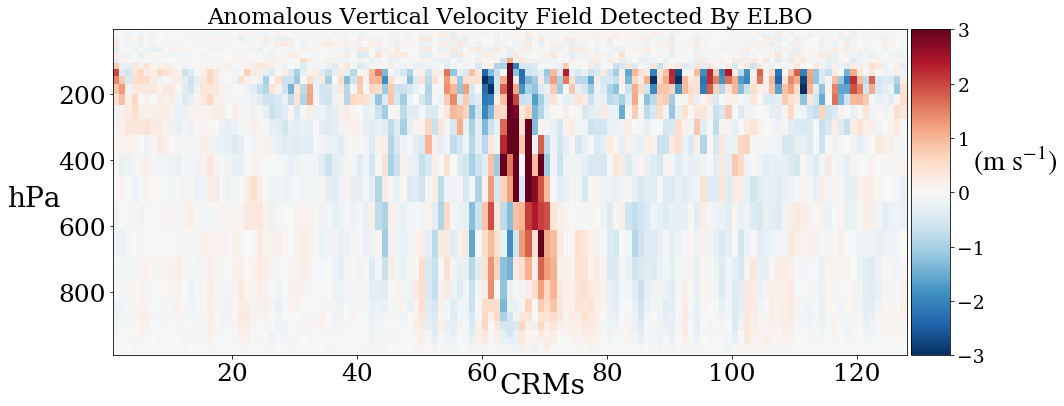

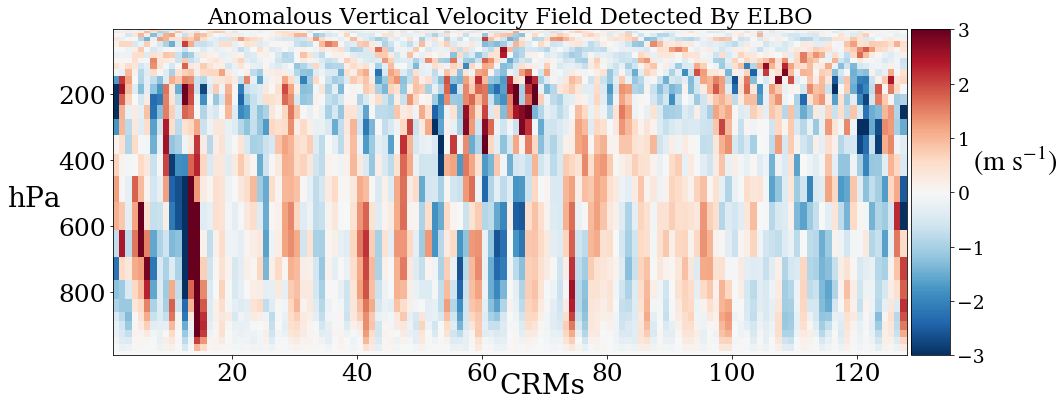

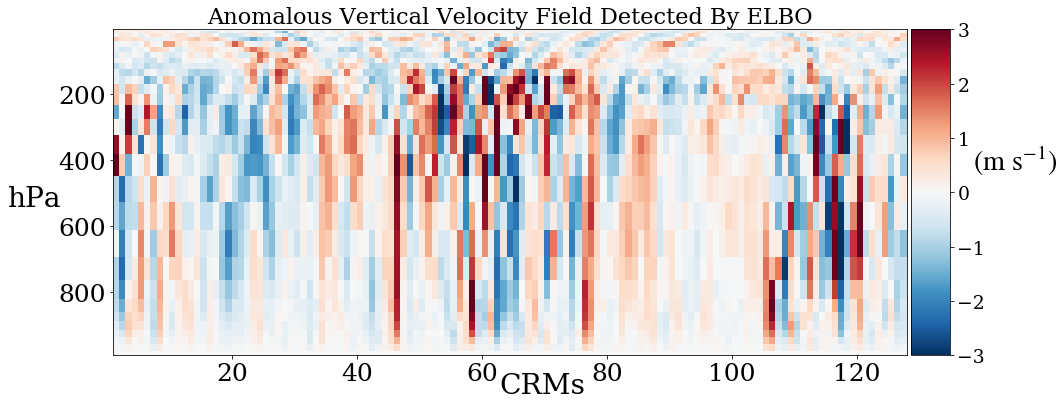

In [26]:
#for i in range(len(Unlikely_Images_500)):
#    plot_generator_paper(Unlikely_Images_500[i,:,:], Xs, Zs)

In [27]:
ranked_w_500 = np.reshape((stats.rankdata(w_500_labels_absolute, method='dense') - 1), w_500_labels_absolute.shape)
ranked_elbo_50_50 = np.reshape((stats.rankdata(elbo_50_50, method='dense') - 1), elbo_50_50.shape)

In [28]:
#for i in range(len(unlikely_50_50)):
#    print(ranked_w_500[unlikely_50_50[i]])

0.8754078260402617


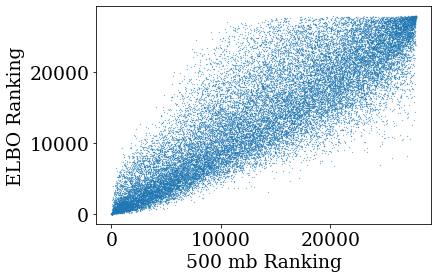

In [29]:
plt.scatter(x=ranked_w_500, y=ranked_elbo_50_50, s=0.05)
plt.xlabel("500 mb Ranking")
plt.ylabel("ELBO Ranking")
print(stats.pearsonr(ranked_w_500, ranked_elbo_50_50)[0])


In [30]:
disagreements = ranked_elbo_50_50 - ranked_w_500

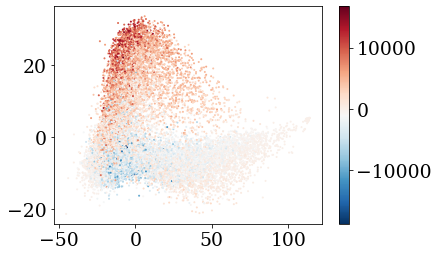

In [32]:
plt.scatter(x=z_test_tsne_50_50[:, 0], y=z_test_tsne_50_50[:, 1], c=disagreements, cmap="RdBu_r", s=1)
plt.colorbar()

In [33]:
disagreements_50_50 = disagreements.argsort()[-100:][::-1]

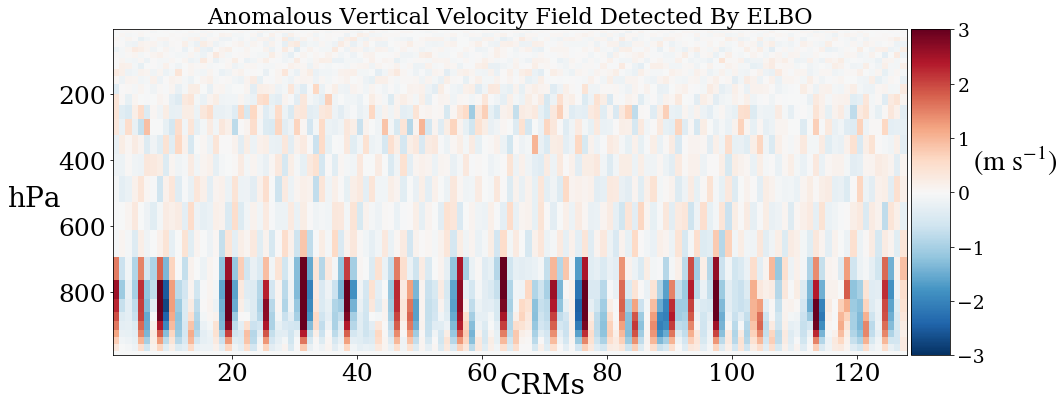

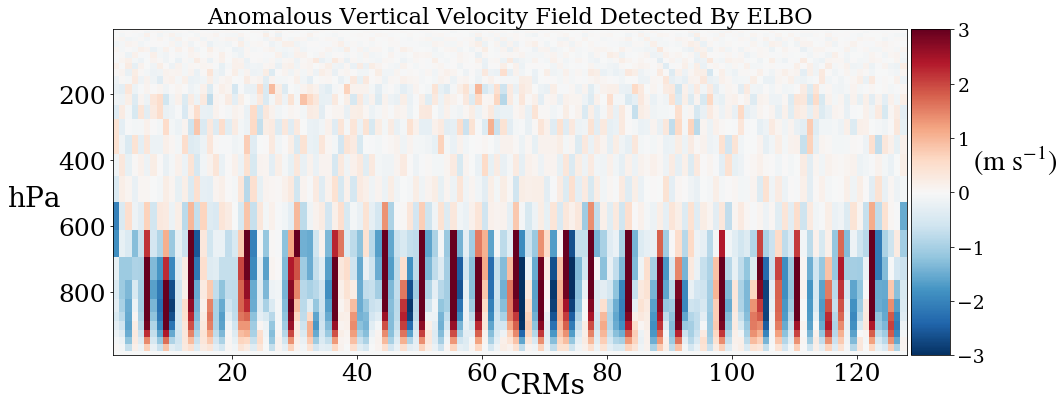

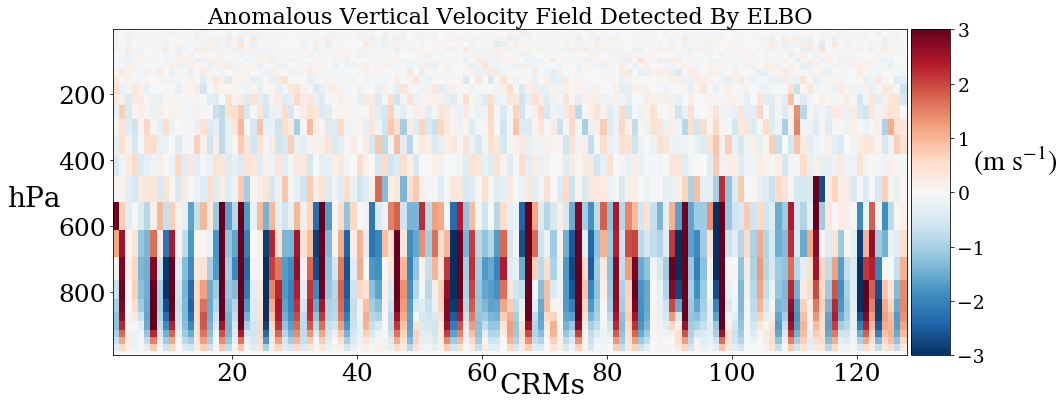

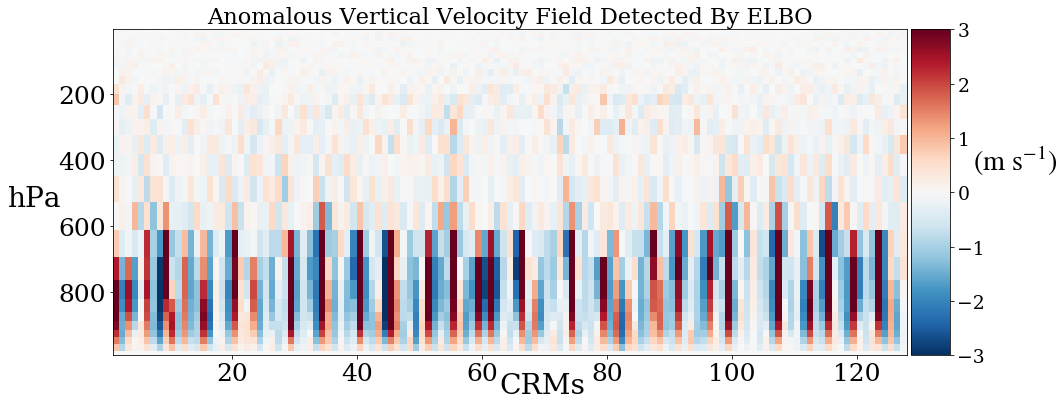

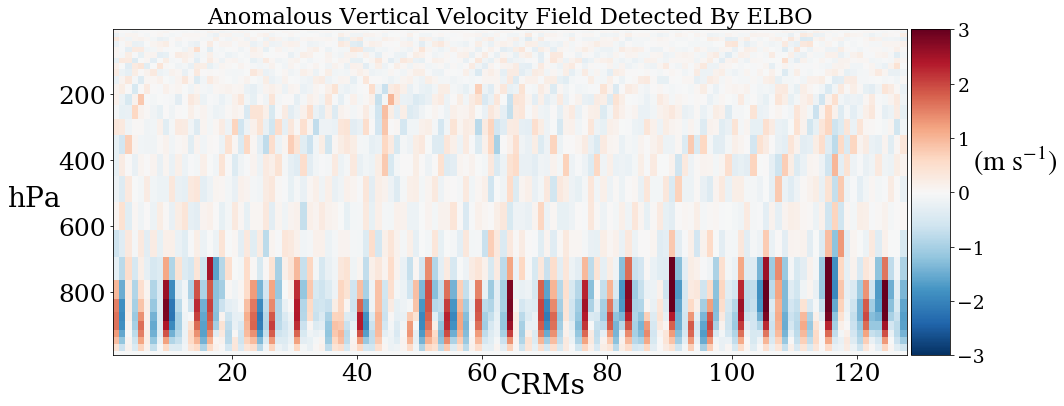

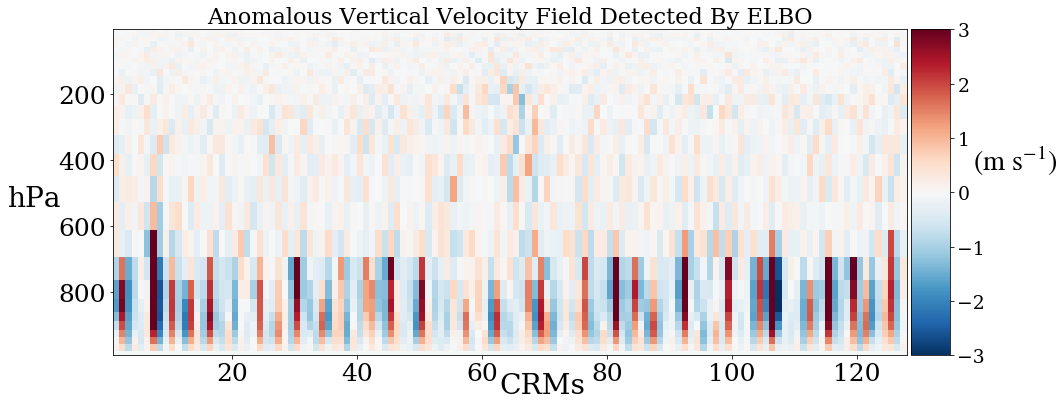

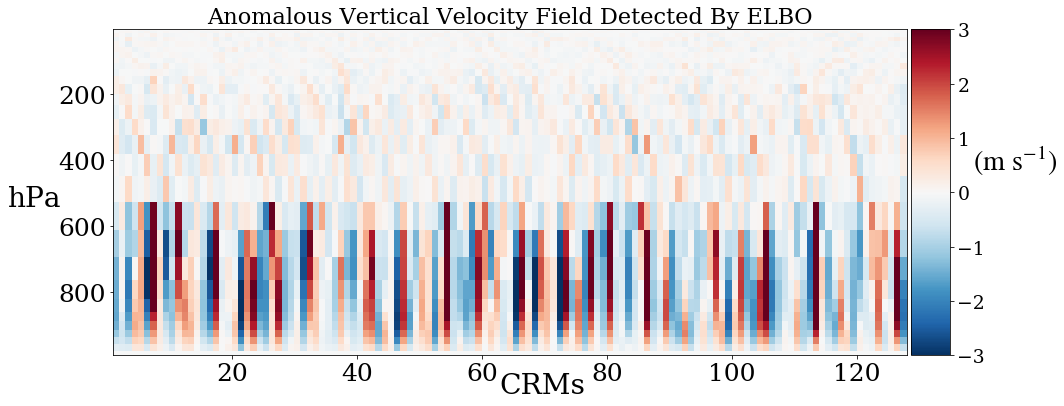

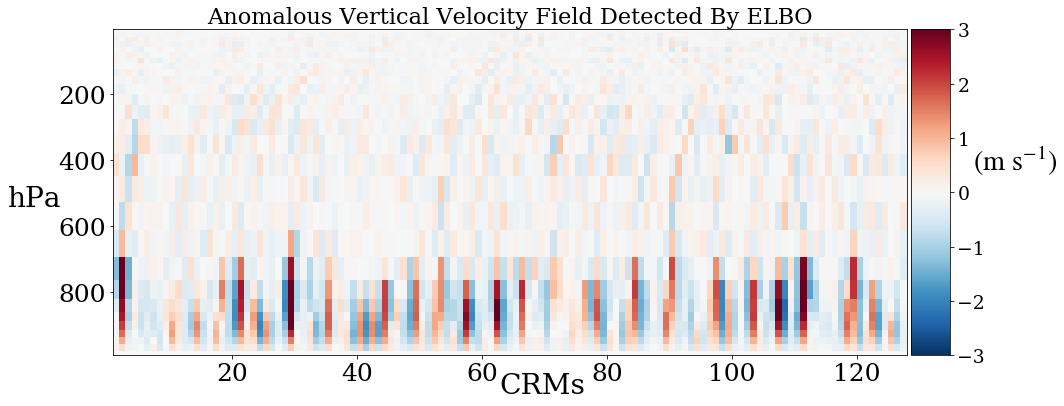

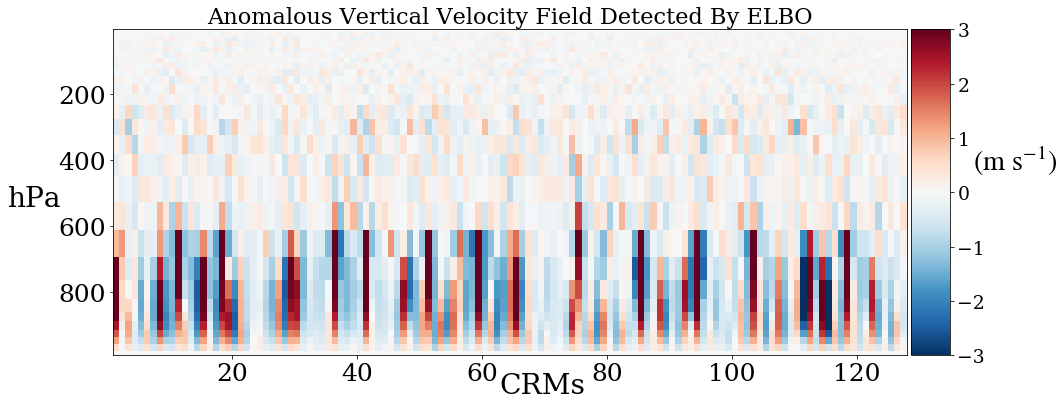

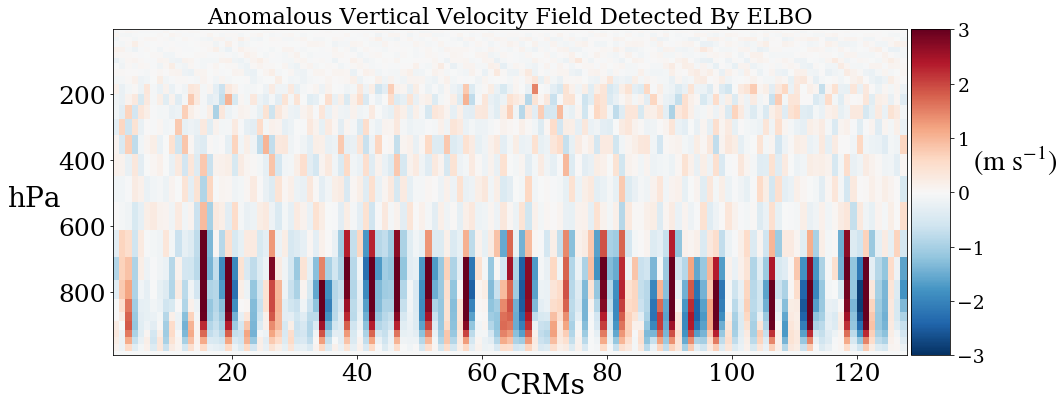

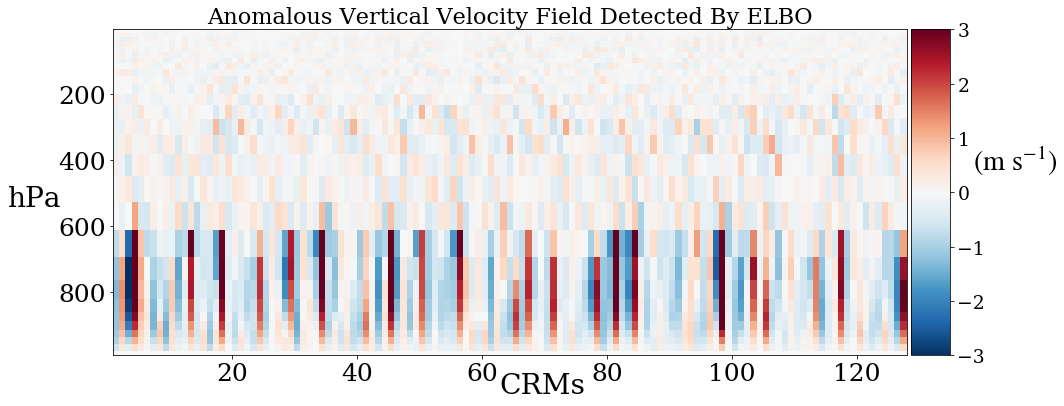

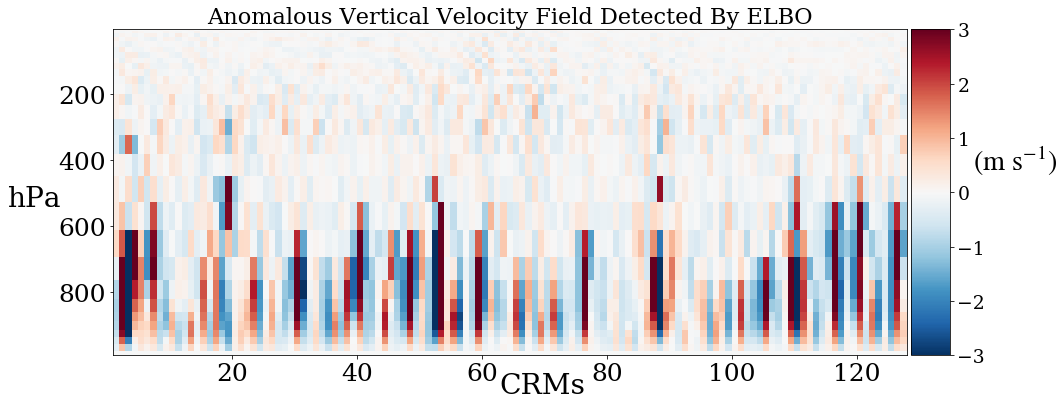

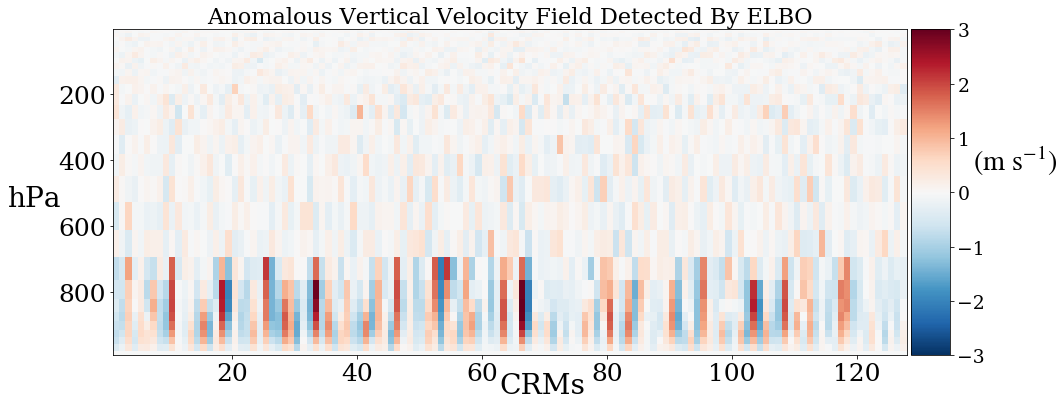

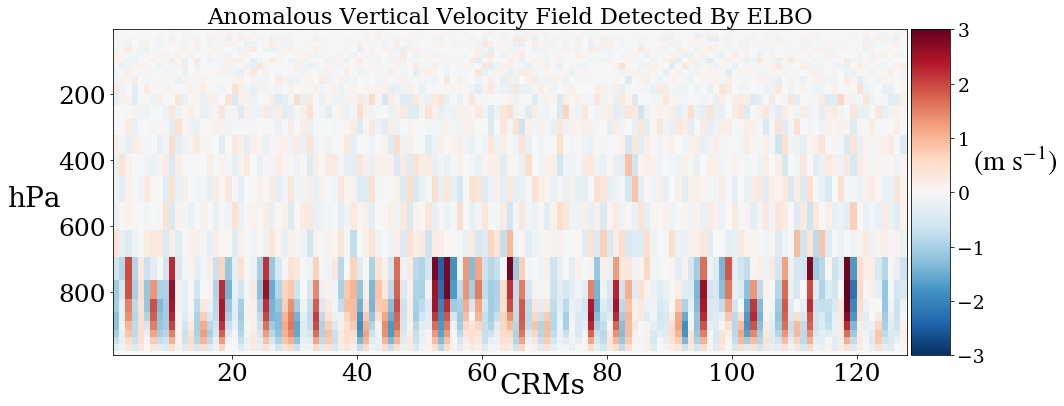

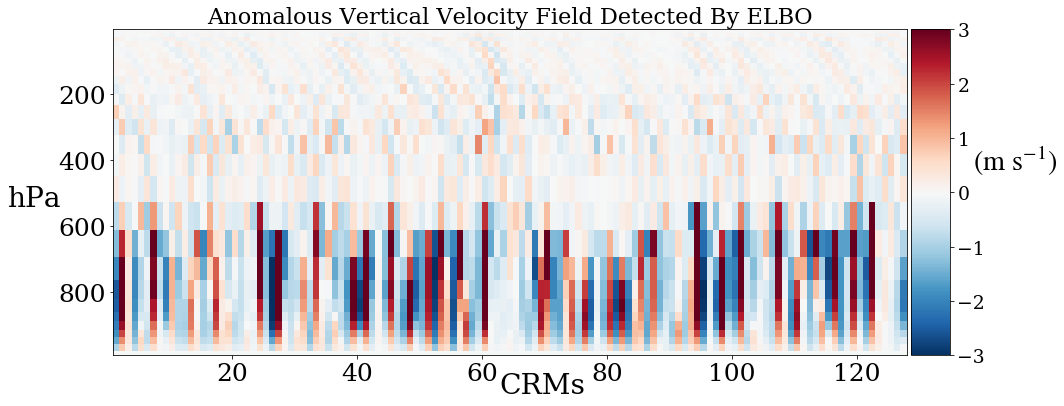

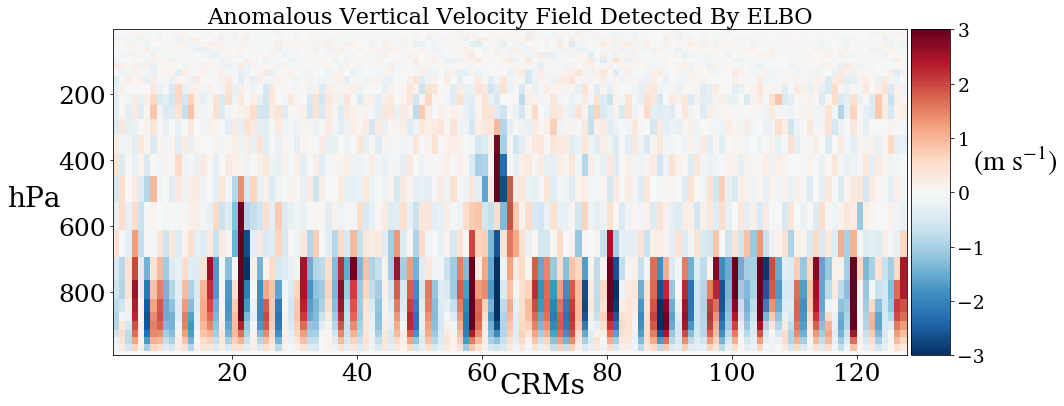

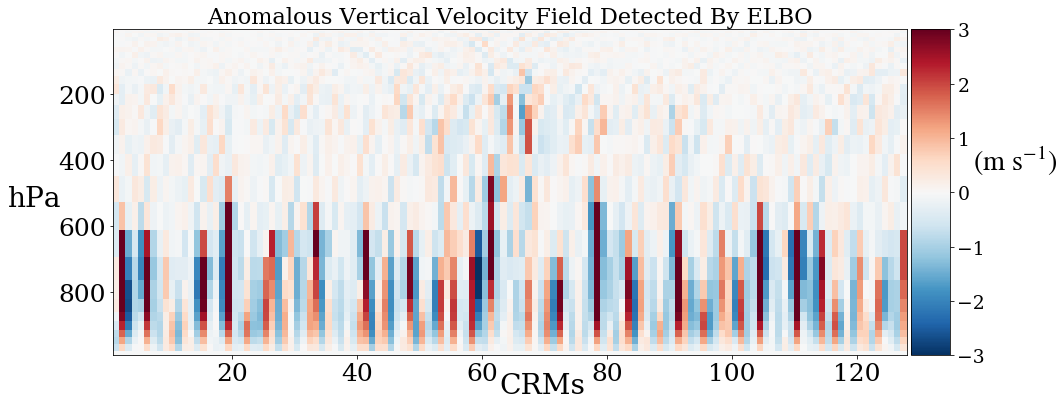

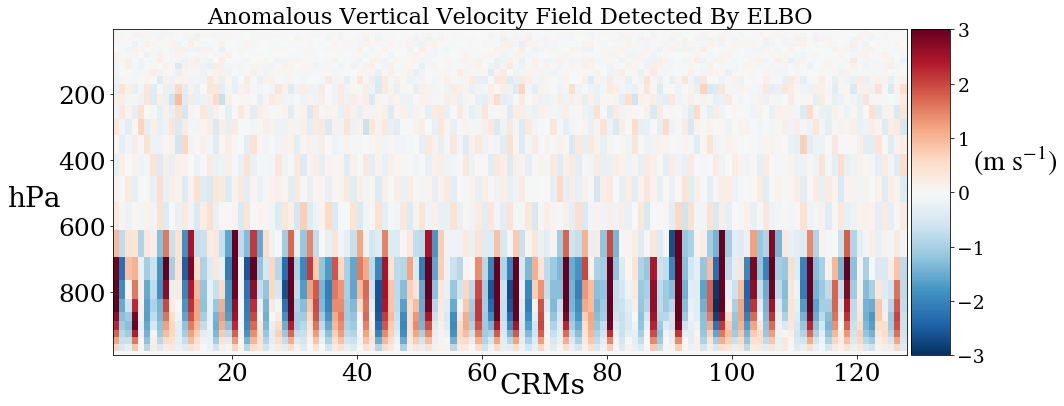

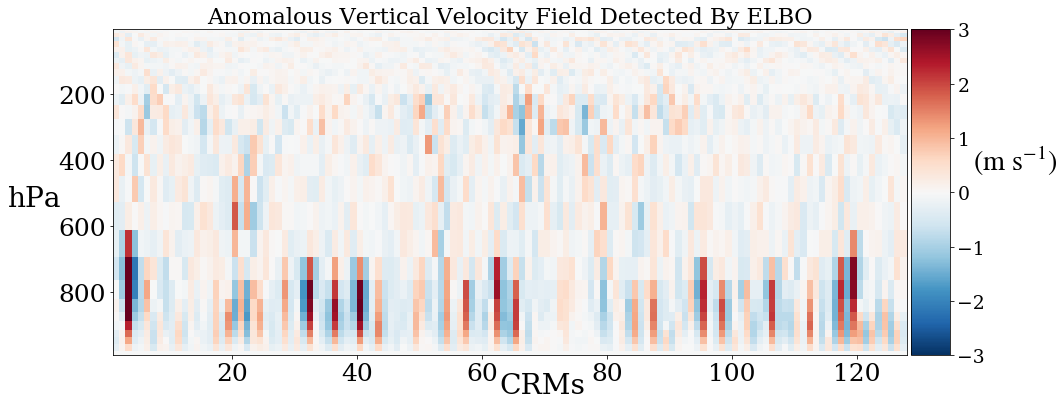

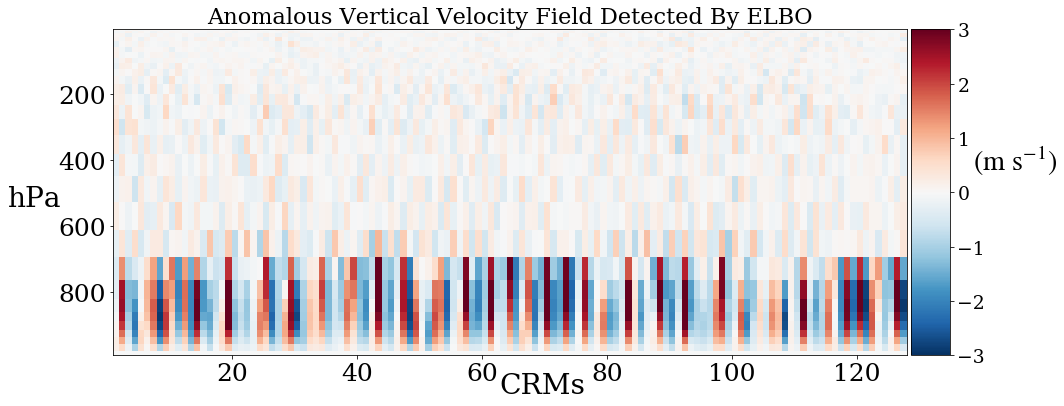

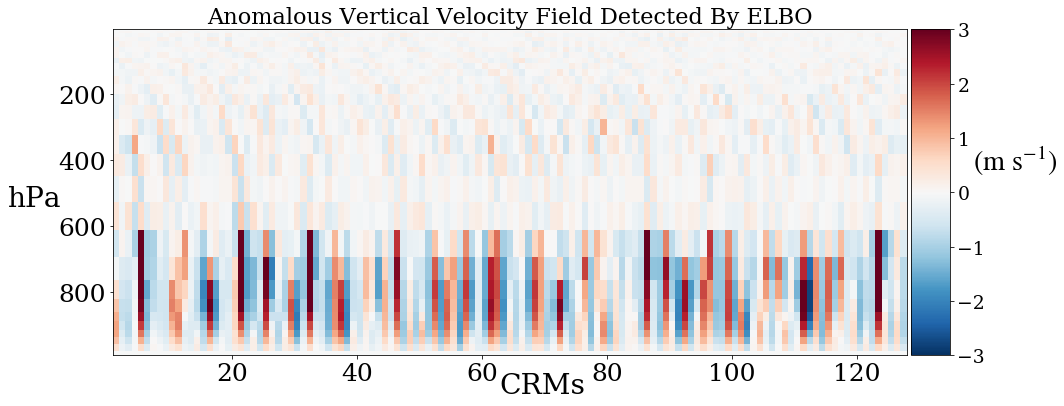

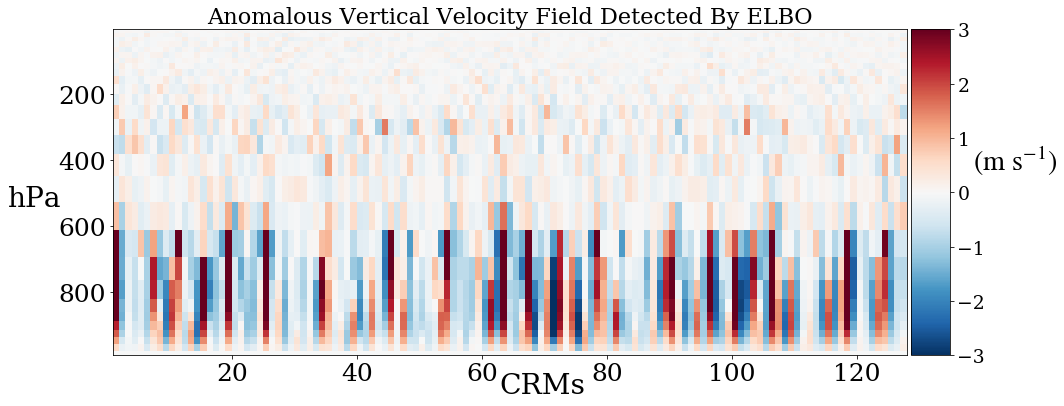

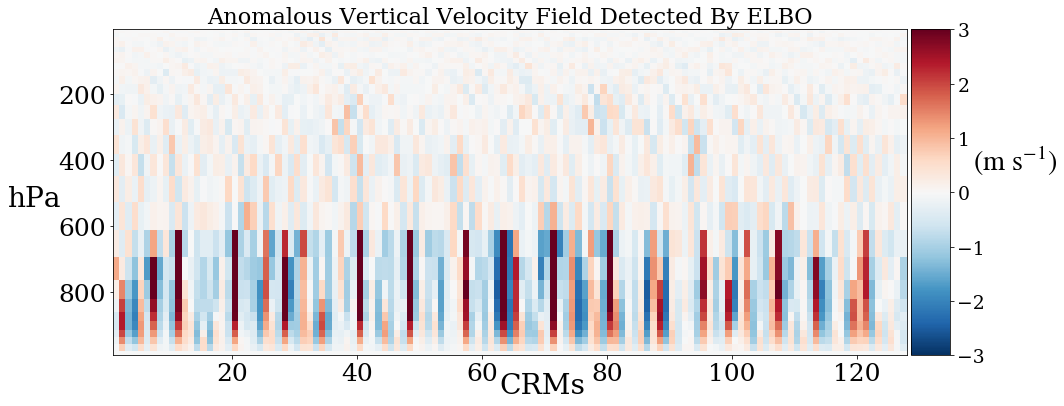

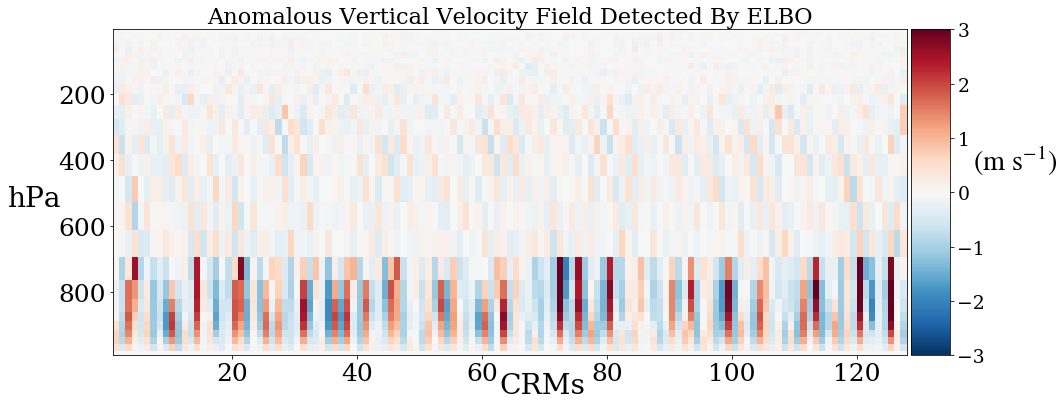

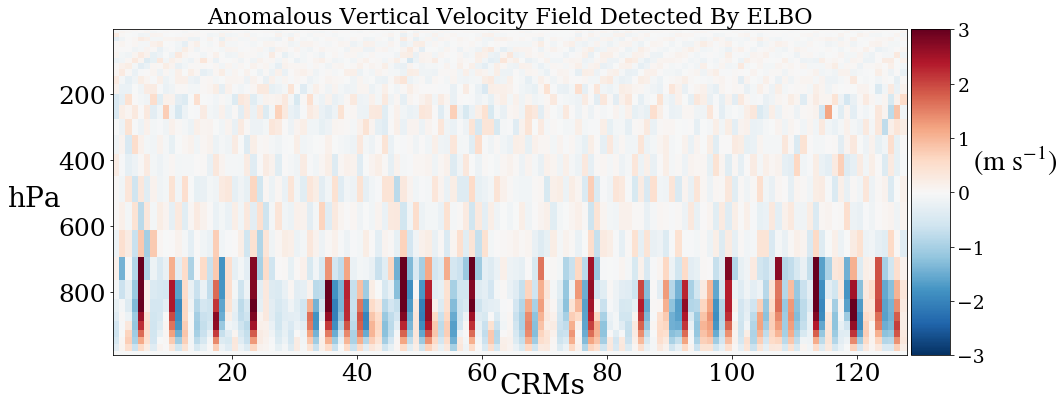

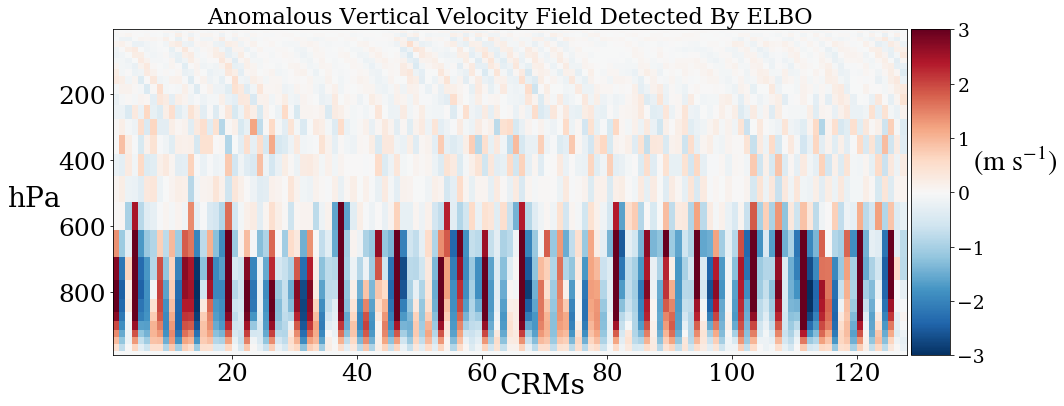

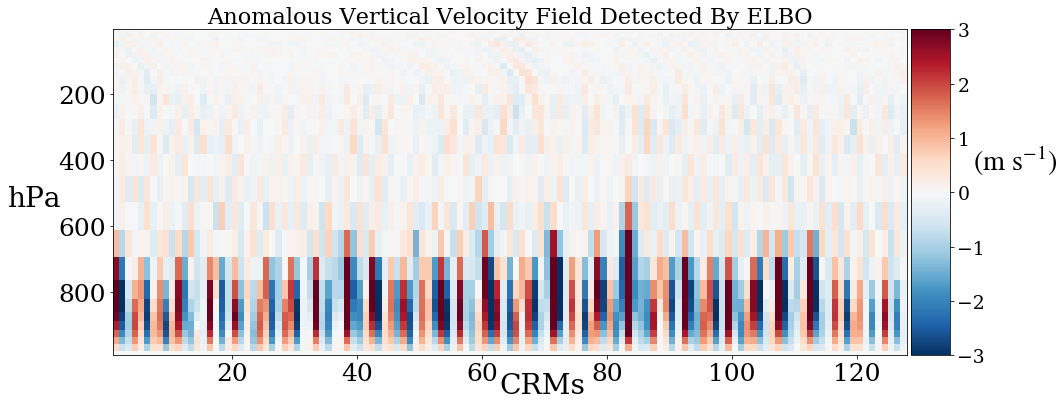

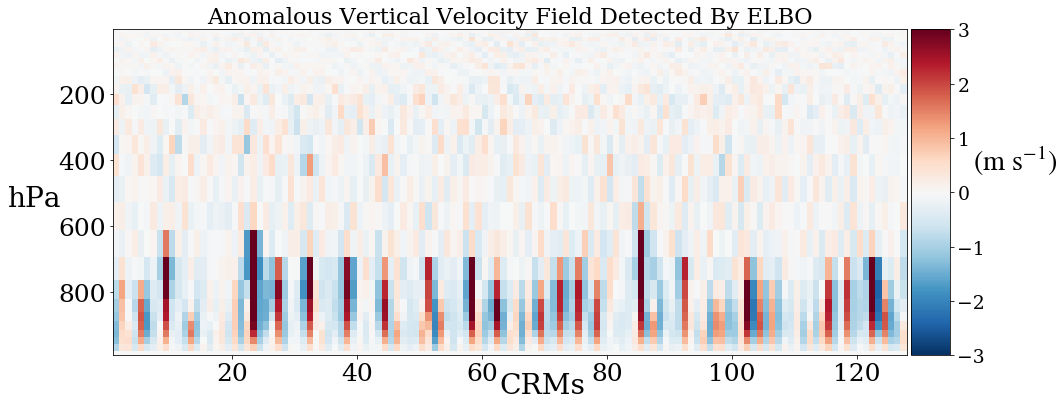

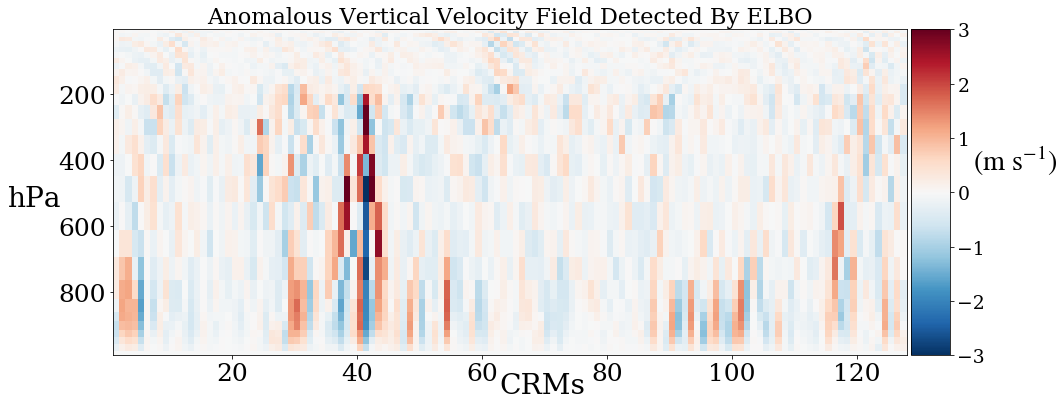

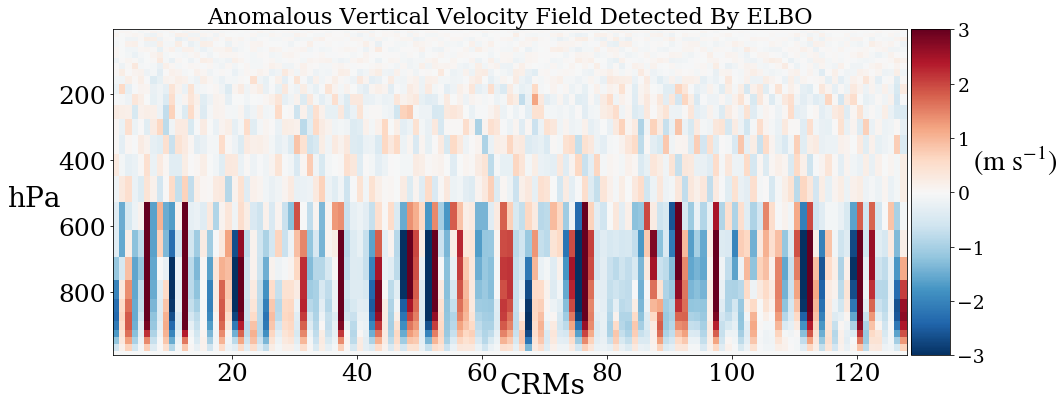

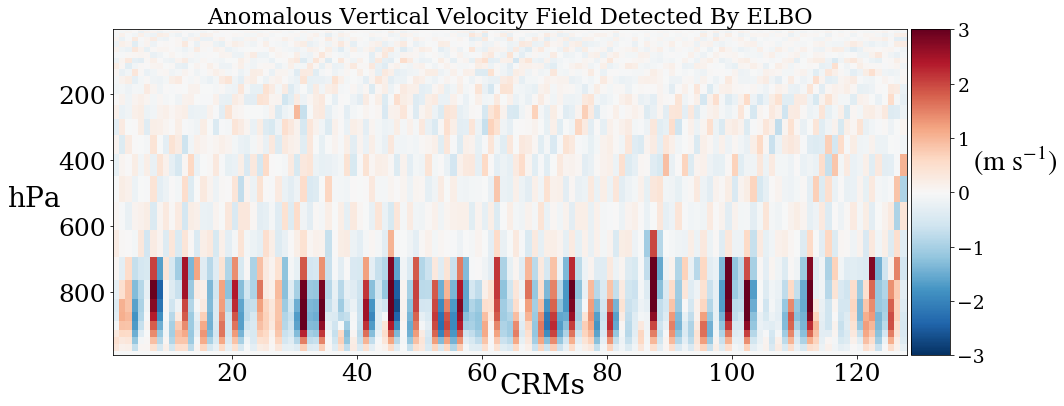

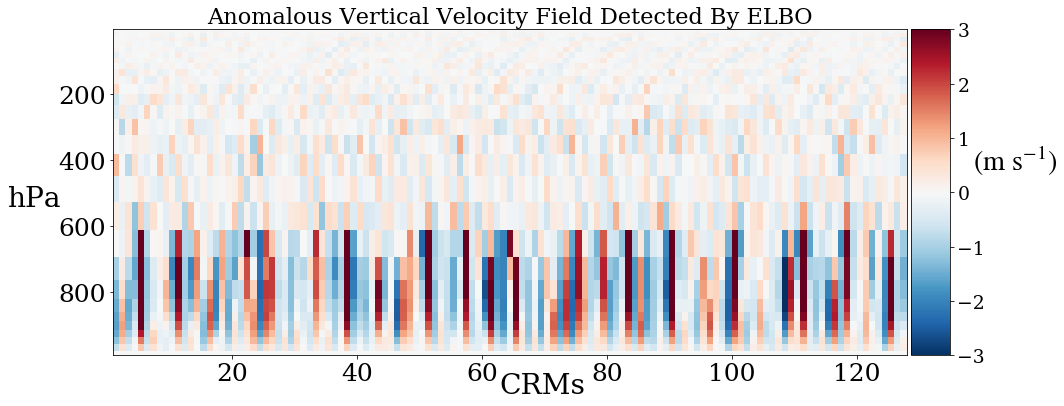

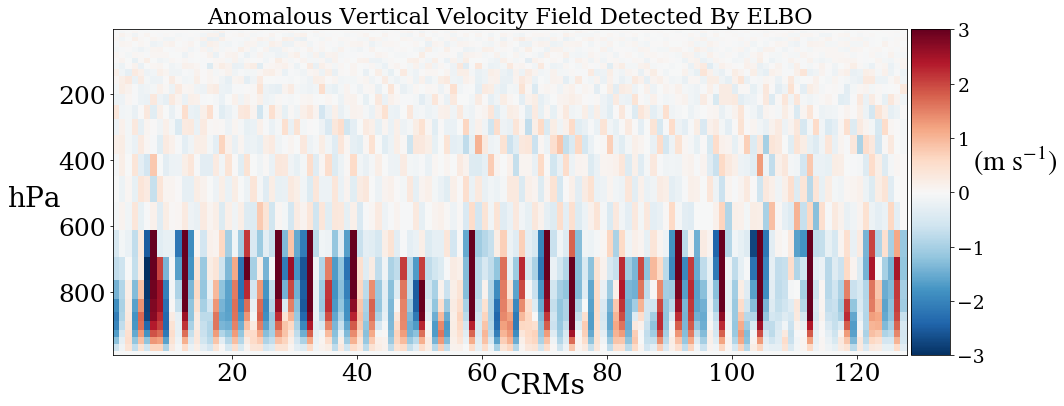

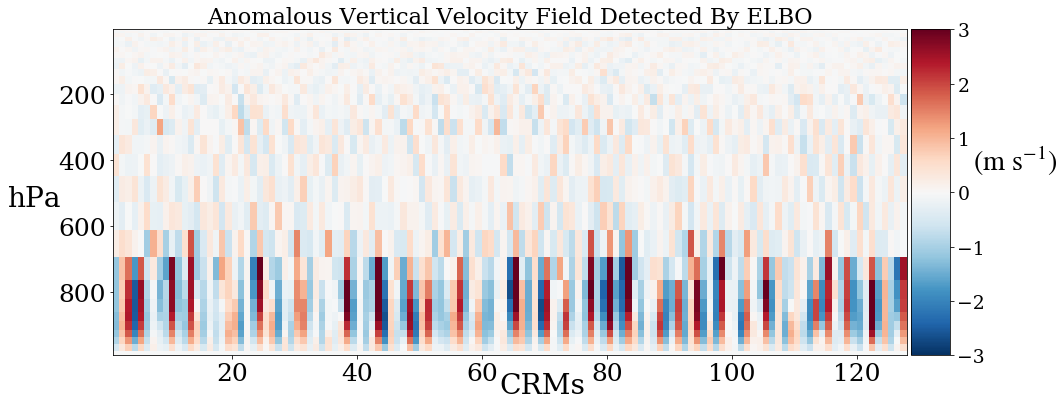

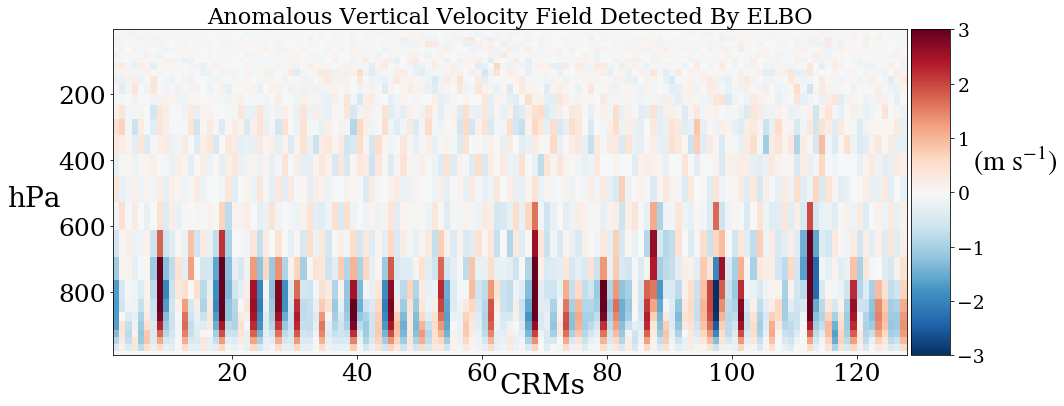

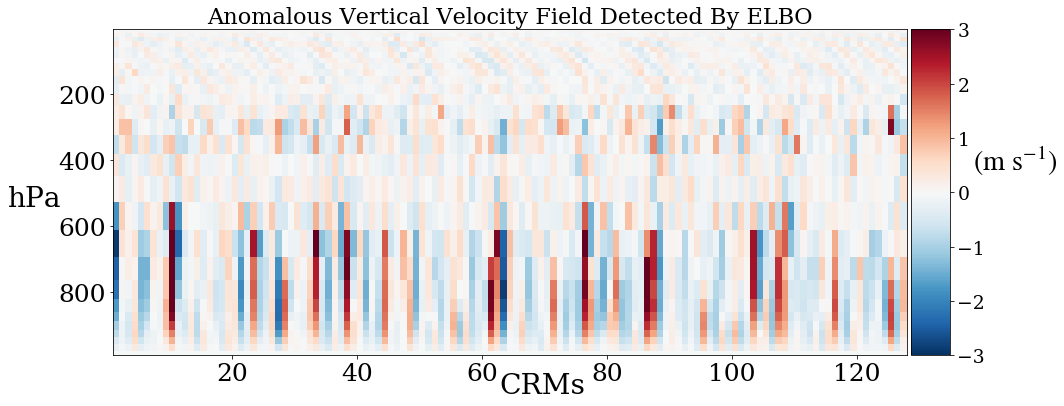

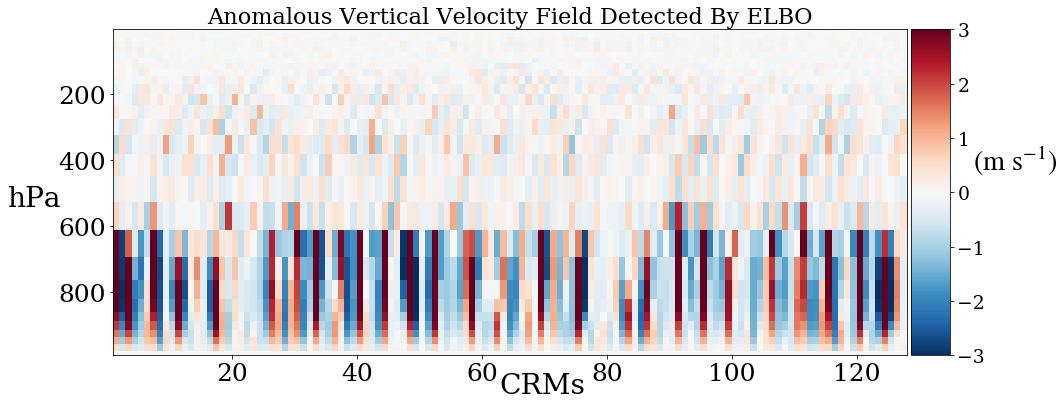

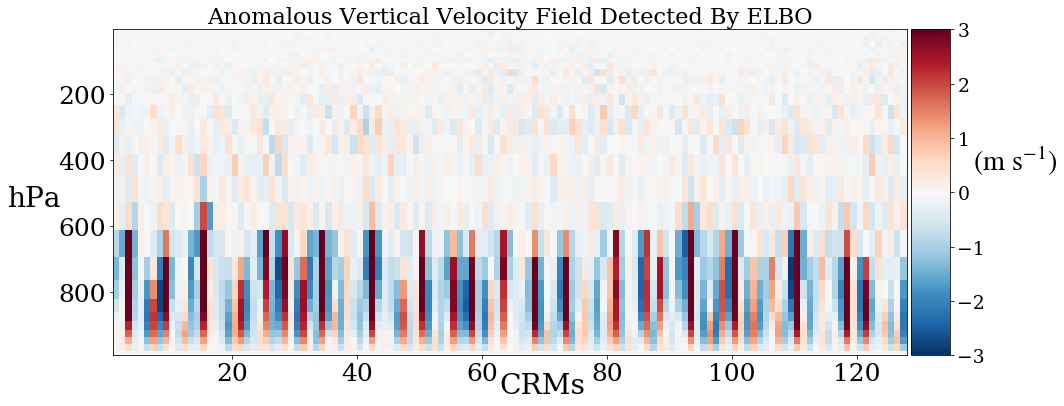

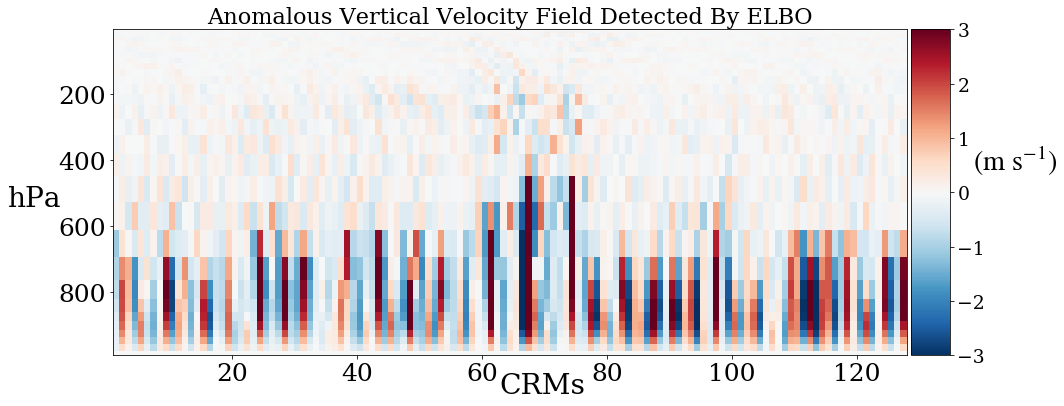

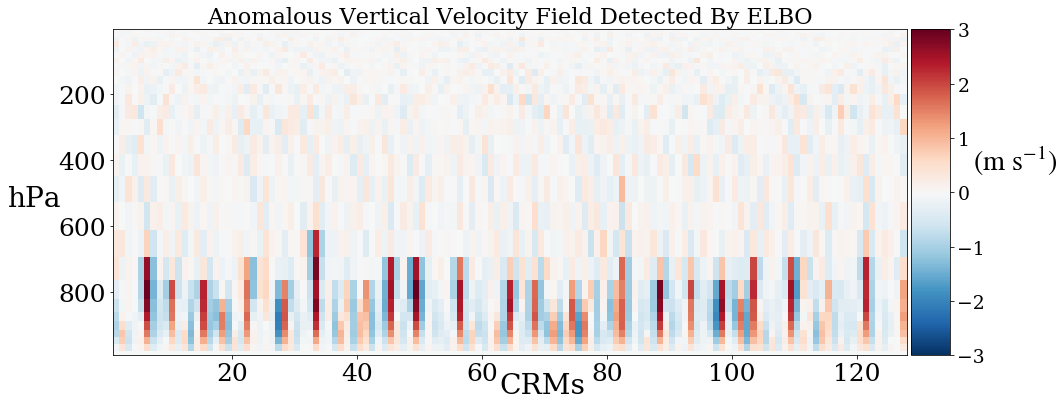

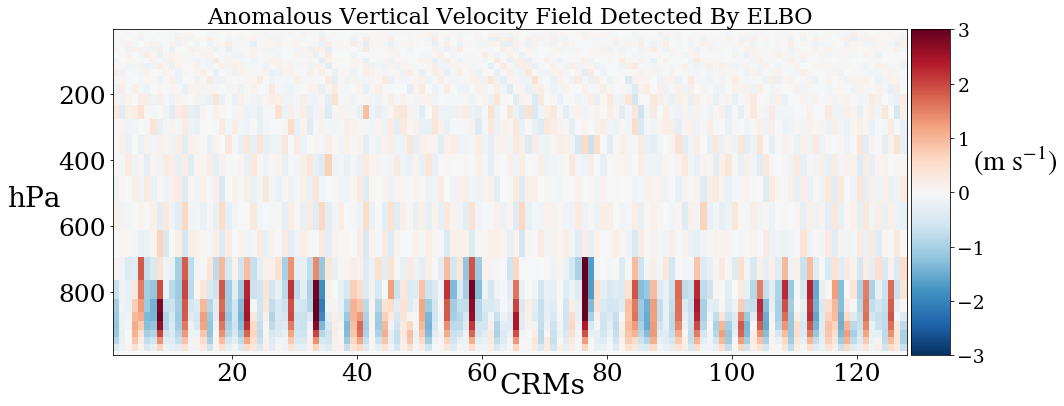

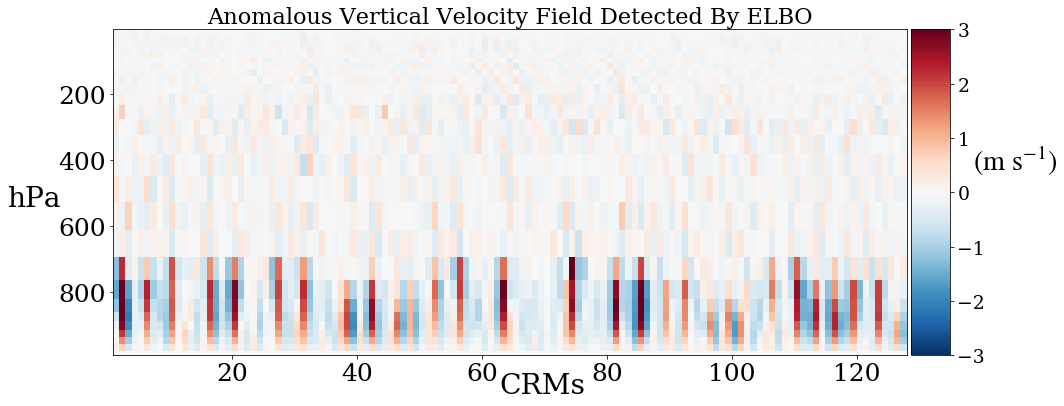

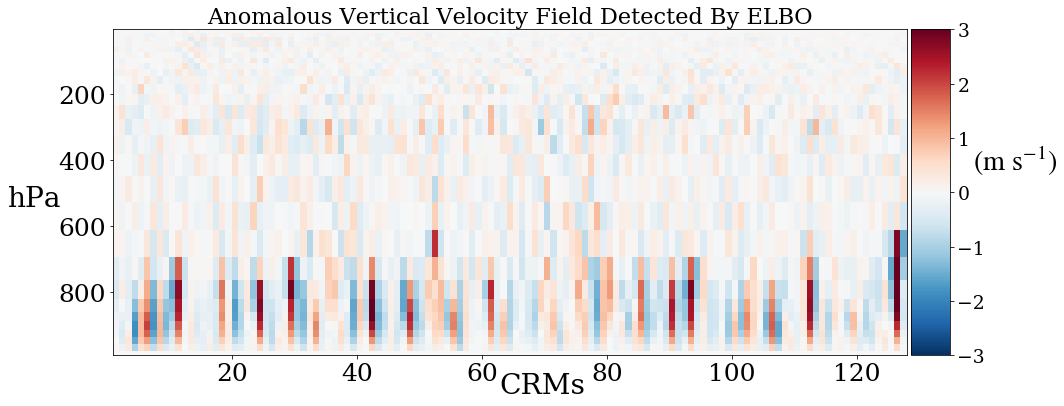

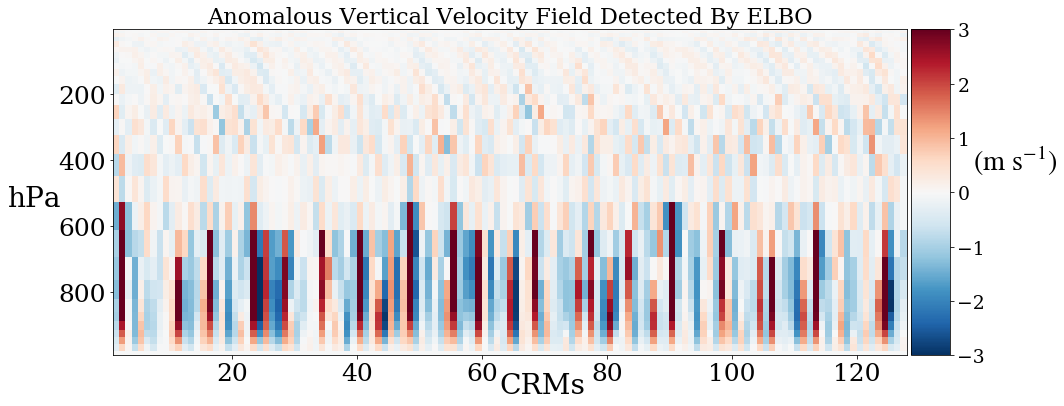

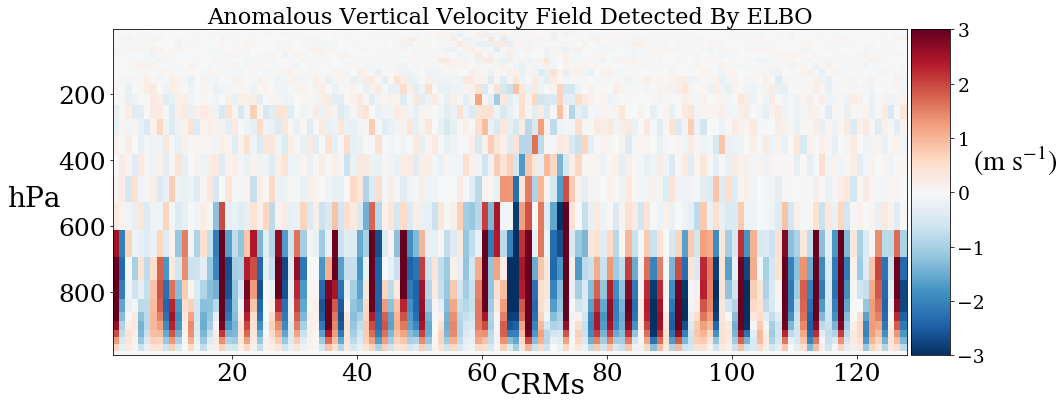

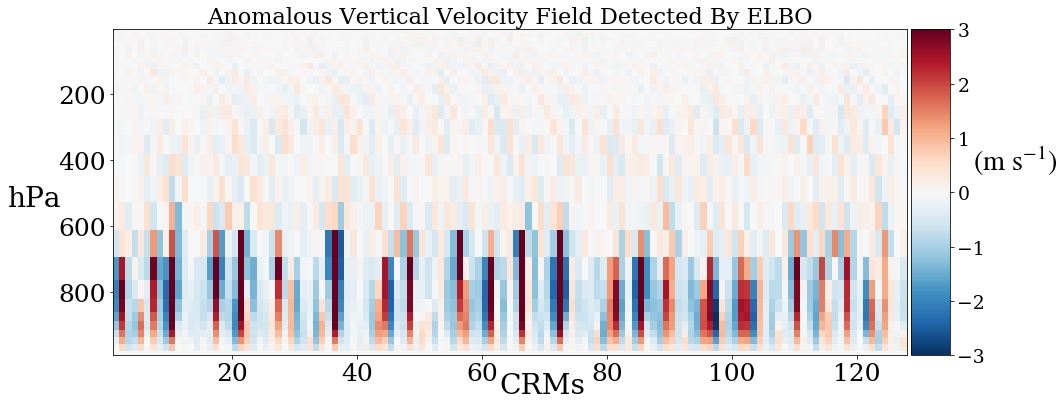

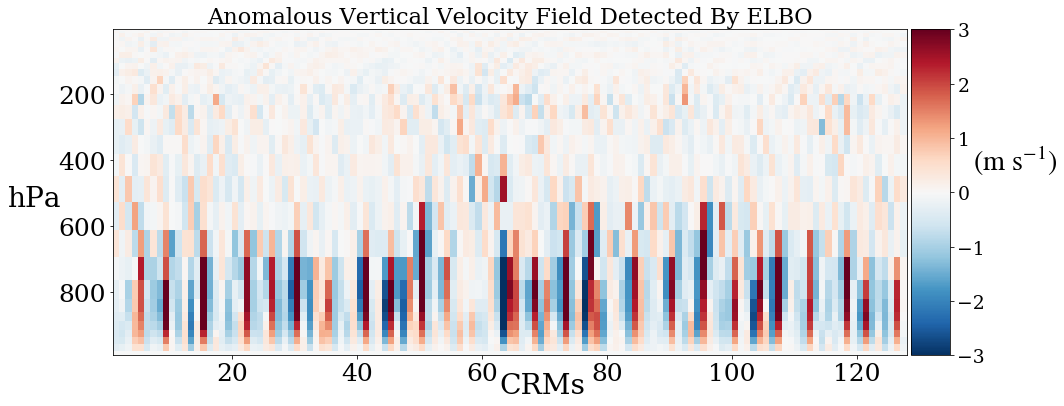

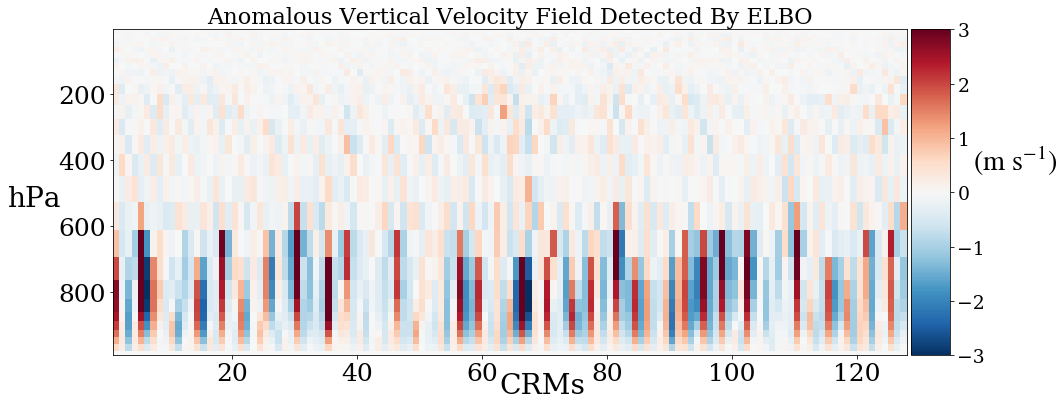

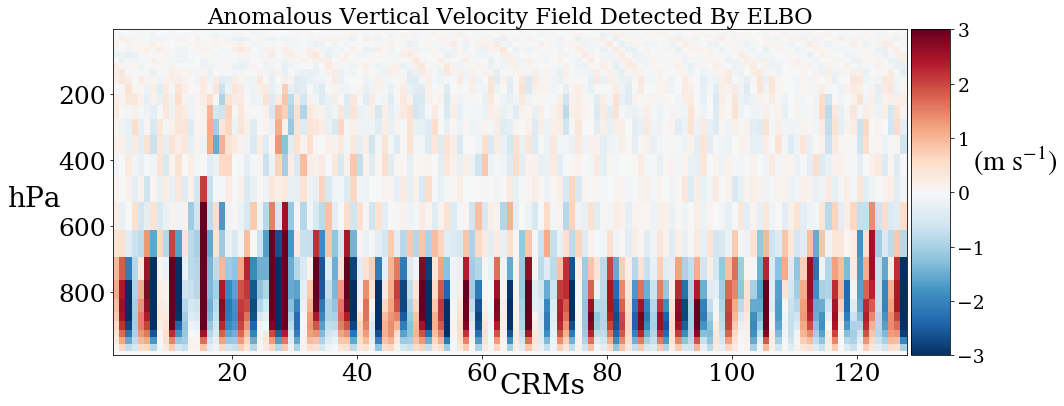

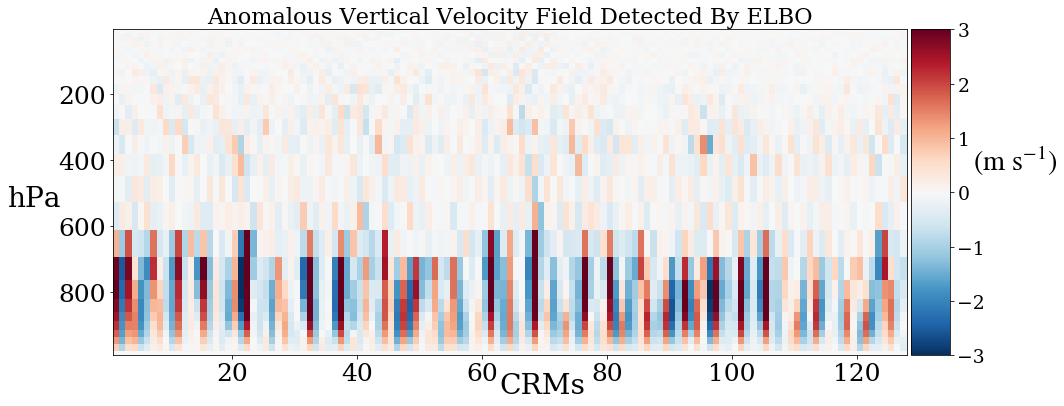

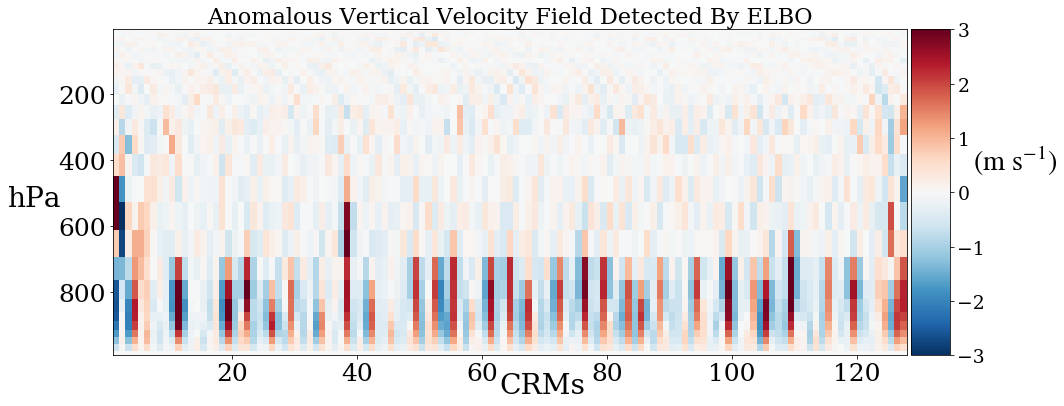

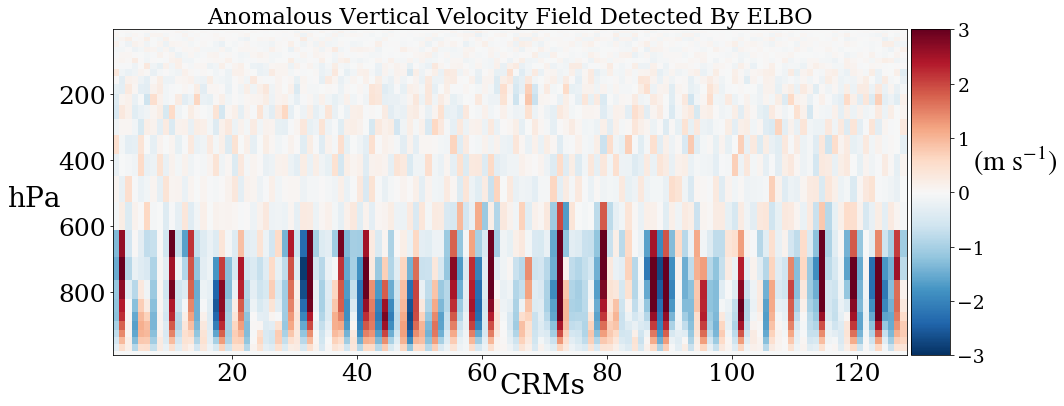

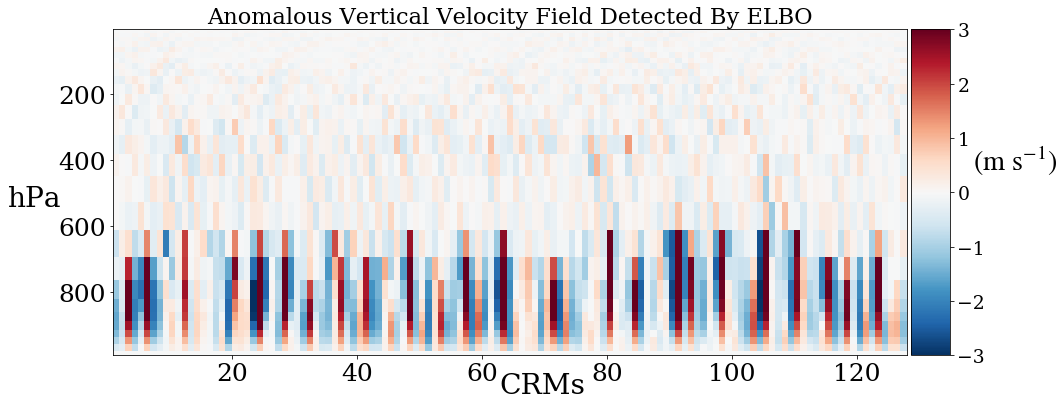

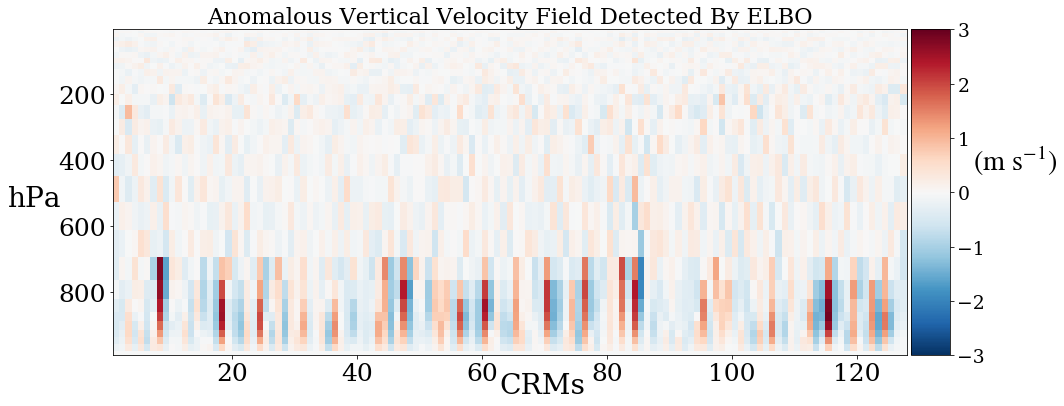

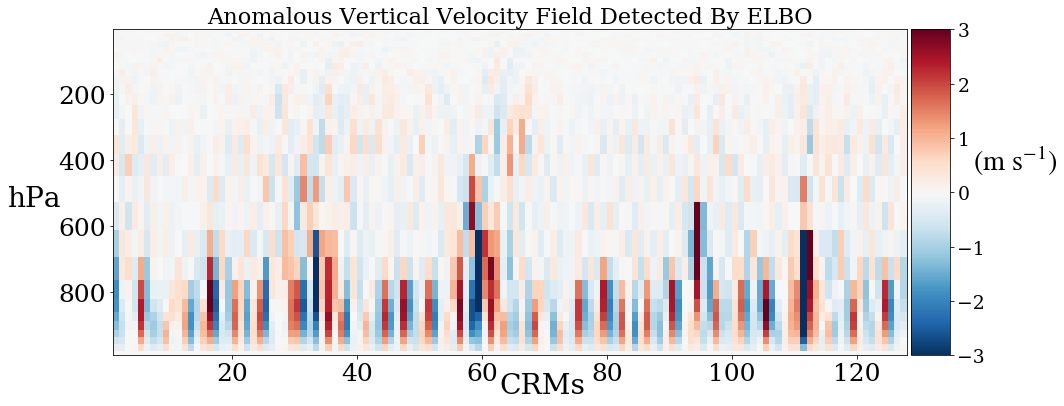

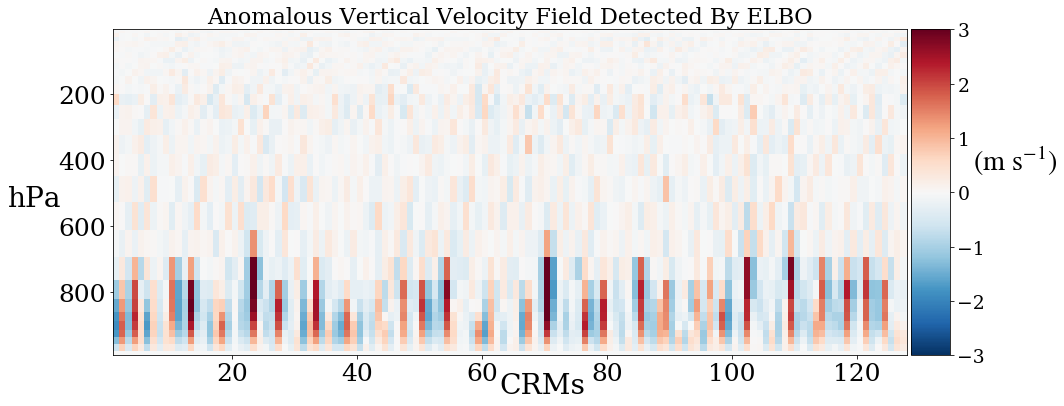

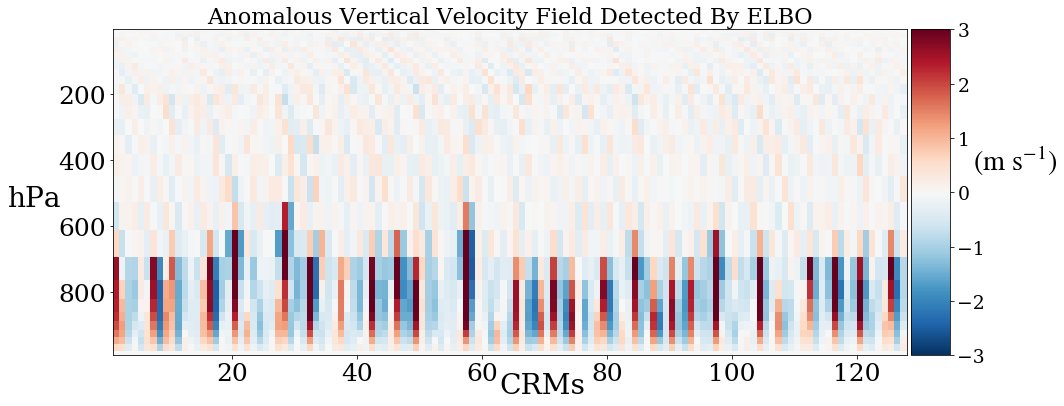

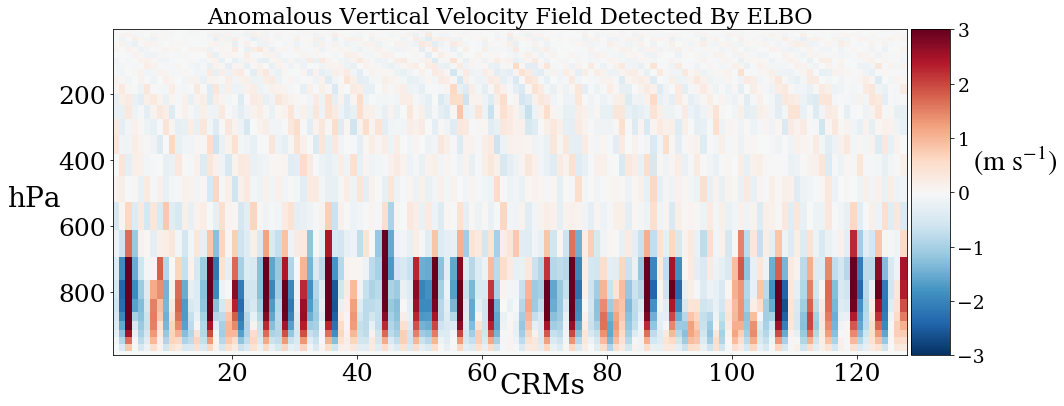

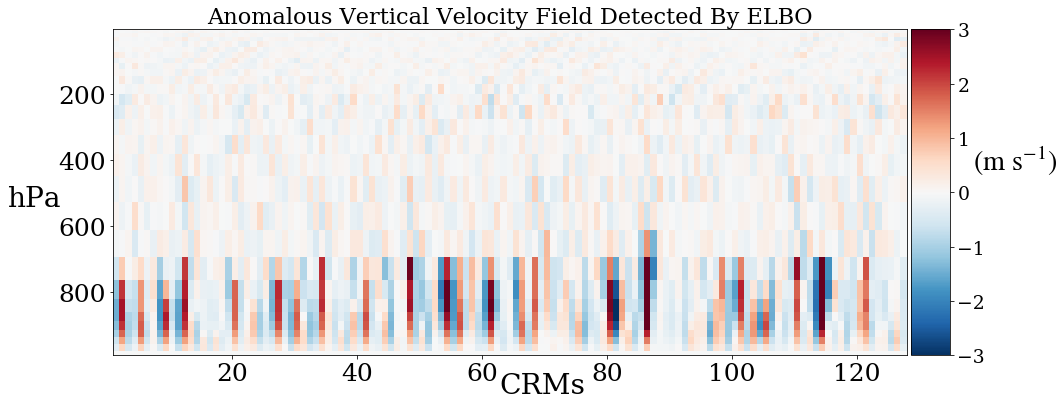

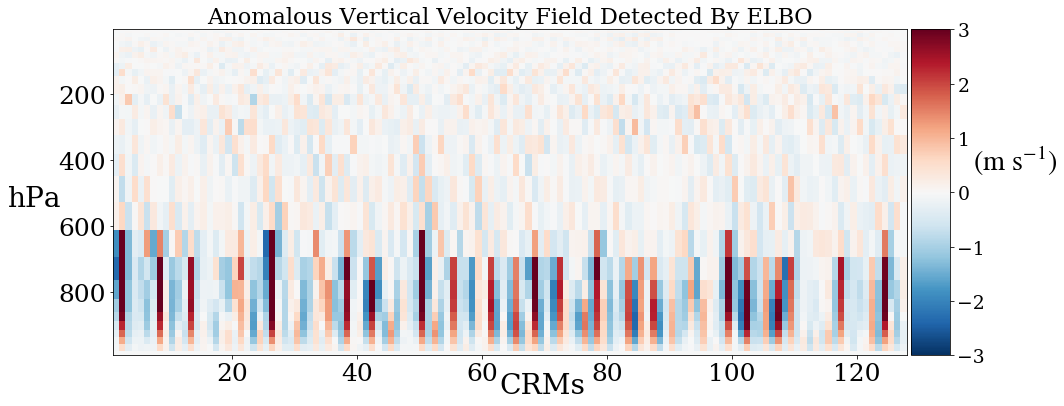

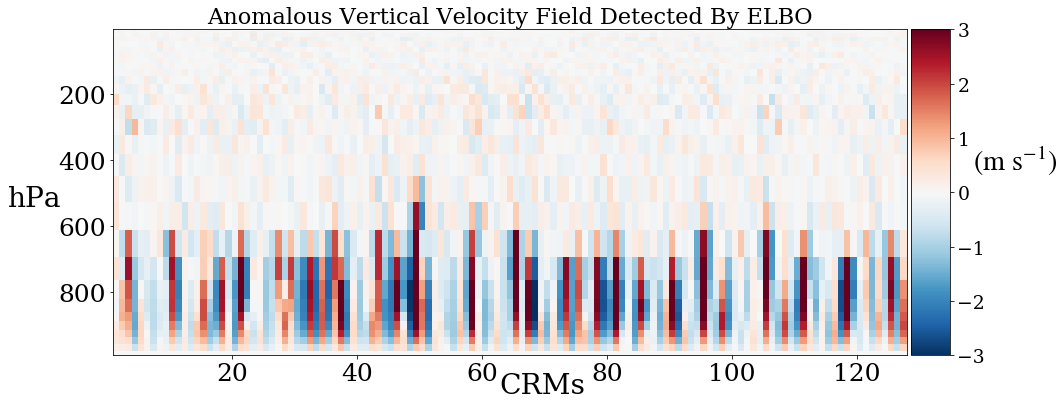

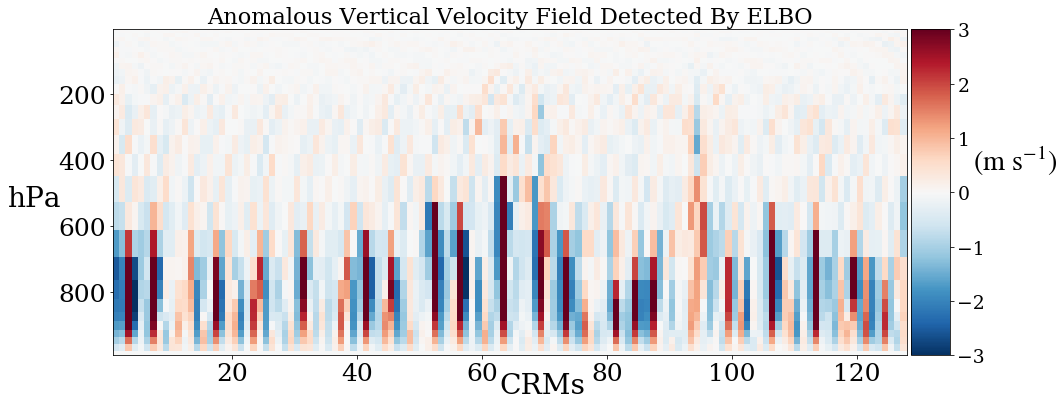

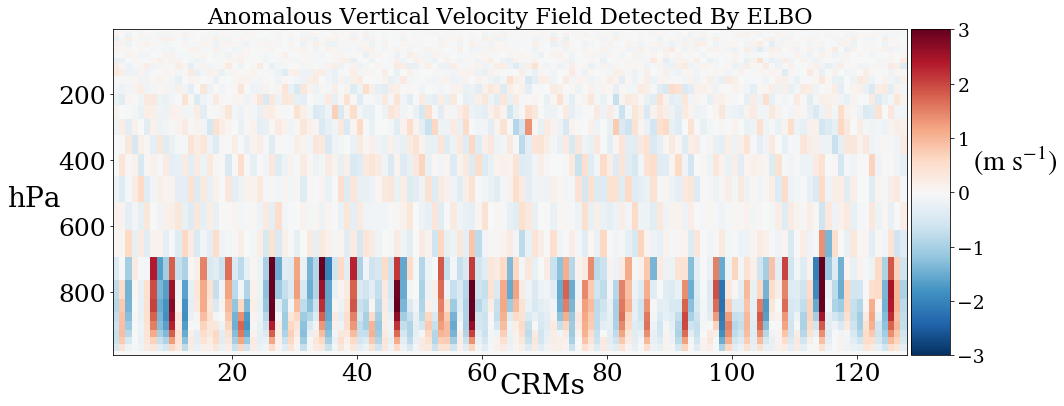

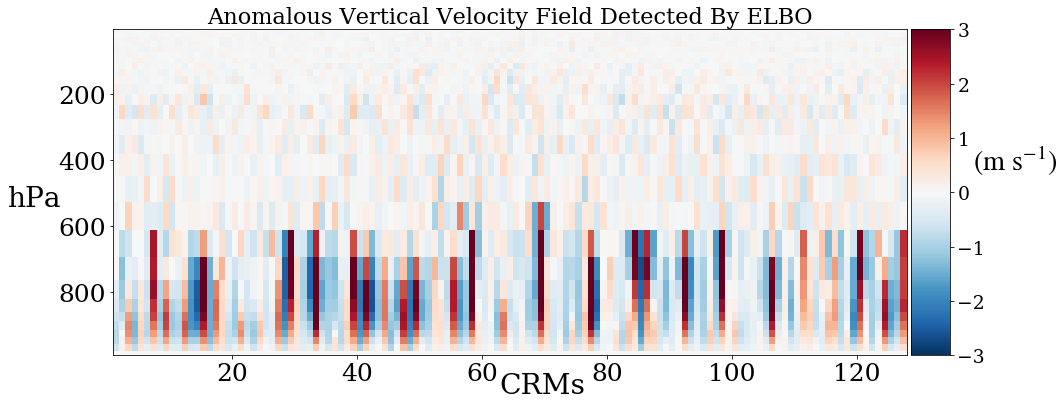

In [ ]:
for i in range(len(disagreements_50_50)):
    plot_generator_paper(Test_Images_50_50[disagreements_50_50[i]],Xs,Zs)